In [1]:
import numpy as np
import pandas as pd

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib

from pathlib import Path

import json

In [2]:
%matplotlib inline

In [3]:
path = Path('/home/jupyter/insight_project/Project-M/data/preprocessed/csv')

In [4]:
filenames = [x for x in list(path.iterdir())]

In [5]:
filenames.remove(Path('/home/jupyter/insight_project/Project-M/data/preprocessed/csv/models'))

In [7]:
i = 0
temp = []
for file in filenames:
    df = pd.read_csv(file)
    df['user'] = i
    i += 1
    temp.append(df)
    if i == 15: break
df_total = pd.concat(temp)


In [8]:
df_total.tail()

,Body,Label,Source,user
78,"Surprisingly, it looks like Kalustyan's [doesn...",1,reddit,14
79,"i also like this this type of product , u can ...",1,twitter,14
80,ZIPPYAR CPG enables brands to stream their vid...,0,twitter,14
81,"Per number two, I think the idea that external...",0,reddit,14
82,The only vehicle I can afford is an old fuel i...,1,reddit,14


In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(stop_words='english')

In [10]:
df_total.shape

(3133, 4)

In [11]:
vectors = vectorizer.fit_transform(df_total['Body'].values).todense()

In [12]:
vectors.shape

(3133, 30797)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
test_input = pca.fit_transform(vectors)

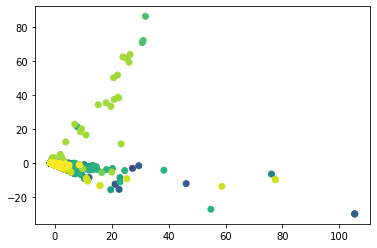

In [15]:
plt.scatter(test_input[:,0],test_input[:,1],c=df_total['user'].values)

In [16]:
from sklearn.manifold import TSNE

In [17]:
pca = PCA(n_components=20)
test_pca = pca.fit_transform(vectors)

In [18]:
test_tsne = TSNE(n_components=2).fit_transform(test_pca)

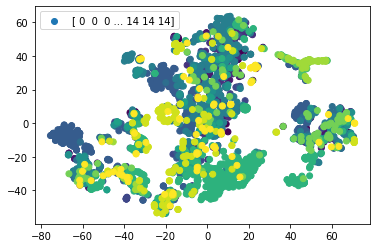

In [22]:
plt.scatter(test_tsne[:,0],test_tsne[:,1],c=df_total['user'].values,label=df_total['user'].values)
plt.legend()

In [31]:
df_0 = pd.read_csv(filenames[0])
df_1 = pd.read_csv(filenames[1])
df_2 = pd.read_csv(filenames[2])
df_3 = pd.read_csv(filenames[3])
df_4 = pd.read_csv(filenames[4])
df_5 = pd.read_csv(filenames[5])

In [32]:
df_0['user'] = 0
df_1['user'] = 1
df_2['user'] = 2
df_3['user'] = 3
df_4['user'] = 4
df_5['user'] = 5

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
vectorizer = CountVectorizer(stop_words='english')

In [33]:
df_total = pd.concat([df_0,df_1,df_2,df_3,df_4,df_5])

In [34]:
vectors = vectorizer.fit_transform(df_total['Body'].values).todense()

In [35]:
vectors.shape

(1128, 12367)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
test_input = pca.fit_transform(vectors)

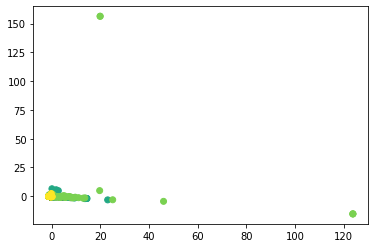

In [37]:
plt.scatter(test_input[:,0],test_input[:,1],c=df_total['user'].values)